# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anthonyfinocchiaro/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv("api.env")
api_key = "c3d5af3cf602413a82b7d82c5fb66b7b"

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)


In [7]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiments)

In [8]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.025366,0.040360,0.030810,0.928820
std,0.351611,0.056582,0.051509,0.070643
min,-0.812600,0.000000,0.000000,0.705000
25%,-0.121500,0.000000,0.000000,0.873000
50%,0.000000,0.000000,0.000000,0.930500
75%,0.318200,0.079000,0.060000,1.000000
max,0.750600,0.218000,0.249000,1.000000


In [9]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.105736,0.048730,0.023770,0.927520
std,0.348368,0.061032,0.044215,0.068794
min,-0.812600,0.000000,0.000000,0.710000
25%,0.000000,0.000000,0.000000,0.878250
50%,0.000000,0.000000,0.000000,0.930000
75%,0.361200,0.080750,0.045750,1.000000
max,0.848100,0.290000,0.249000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the higher mean positive score of 0.048730 compared to BTCs 0.040360

Q: Which coin had the highest compound score?

A: Ethereum has the higher compound score of 0.848100 compared to BTCs 0.750600

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score found at the positive 75% deviation of 0.080750

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
nltk.download("stopwords")
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthonyfinocchiaro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()
sw = stopwords.words('english')

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    # Remove the punctuation
    re_clean = regex.sub('', text)  
    # Remove the stopwords
    words = word_tokenize(re_clean)   
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]   
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    
    
    
    return tokens
   

In [13]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

nltk.download('wordnet')
nltk.download('punkt')

bitcoin_df['tokens'] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anthonyfinocchiaro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anthonyfinocchiaro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,compound,positive,negative,neutral,tokens
0,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.000,0.831,"[clean, energy, seemselon, musk, tesla, caused..."
1,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705,"[filed, underthe, supply, chain, attack, ha, r..."
2,"Several crypto fans that descended on Miami, F...",0.5574,0.107,0.000,0.893,"[several, crypto, fan, descended, miami, flori..."
3,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857,"[image, copyrightgetty, imagesthe, gang, behin..."
4,"SAN SALVADOR, June 16 (Reuters) - El Salvador ...",0.1280,0.043,0.000,0.957,"[san, salvador, june, reuters, el, salvador, r..."


In [14]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_df['tokens'] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,text,compound,positive,negative,neutral,tokens
0,TL;DR: The Cryptocurrency with Ethereum and So...,0.0000,0.000,0.000,1.000,"[tldr, cryptocurrency, ethereum, solidity, blo..."
1,It wasn't long ago that your average person ha...,-0.2960,0.000,0.061,0.939,"[wasnt, long, ago, average, person, clue, nft,..."
2,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849,"[bitcoin, ethereumyuriko, nakaoether, overtook..."
3,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.000,0.806,"[ether, holder, staked, billion, worth, crypto..."
4,Ether is the cryptocurrency of the ethereum ne...,0.6249,0.150,0.000,0.850,"[ether, cryptocurrency, ethereum, networkphoto..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_ngram = ngrams(tokenizer(bitcoin_df.text.str.cat()), n=2)
Counter(btc_ngram).most_common(10)

[(('june', 'reuters'), 23),
 (('reuters', 'bitcoin'), 18),
 (('charsby', 'reuters'), 15),
 (('taken', 'june'), 13),
 (('el', 'salvador'), 12),
 (('world', 'biggest'), 12),
 (('previous', 'closebitcoin'), 11),
 (('closebitcoin', 'world'), 11),
 (('biggest', 'bestknown'), 11),
 (('june', 'reutersedgar'), 11)]

In [17]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ethereum_ngram = ngrams(tokenizer(ethereum_df.text.str.cat()), n=2)
Counter(ethereum_ngram).most_common(10)

[(('reuters', 'bitcoin'), 13),
 (('world', 'biggest'), 12),
 (('previous', 'closebitcoin'), 11),
 (('closebitcoin', 'world'), 11),
 (('biggest', 'bestknown'), 11),
 (('nonfungible', 'token'), 10),
 (('bestknown', 'cryptocurrency'), 10),
 (('charsby', 'reuters'), 10),
 (('taken', 'june'), 9),
 (('june', 'reuters'), 9)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
top_btc_wrds = tokenizer(bitcoin_df.text.str.cat())
token_count(top_btc_wrds, 10)

[('bitcoin', 82),
 ('reuters', 63),
 ('june', 44),
 ('cryptocurrency', 29),
 ('el', 22),
 ('monday', 22),
 ('world', 21),
 ('salvador', 19),
 ('seen', 18),
 ('illustration', 18)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
top_eth_wrds = tokenizer(ethereum_df.text.str.cat())
token_count(top_eth_wrds, 10)

[('reuters', 36),
 ('cryptocurrency', 34),
 ('bitcoin', 34),
 ('world', 24),
 ('june', 21),
 ('ethereum', 17),
 ('token', 14),
 ('biggest', 13),
 ('seen', 12),
 ('previous', 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

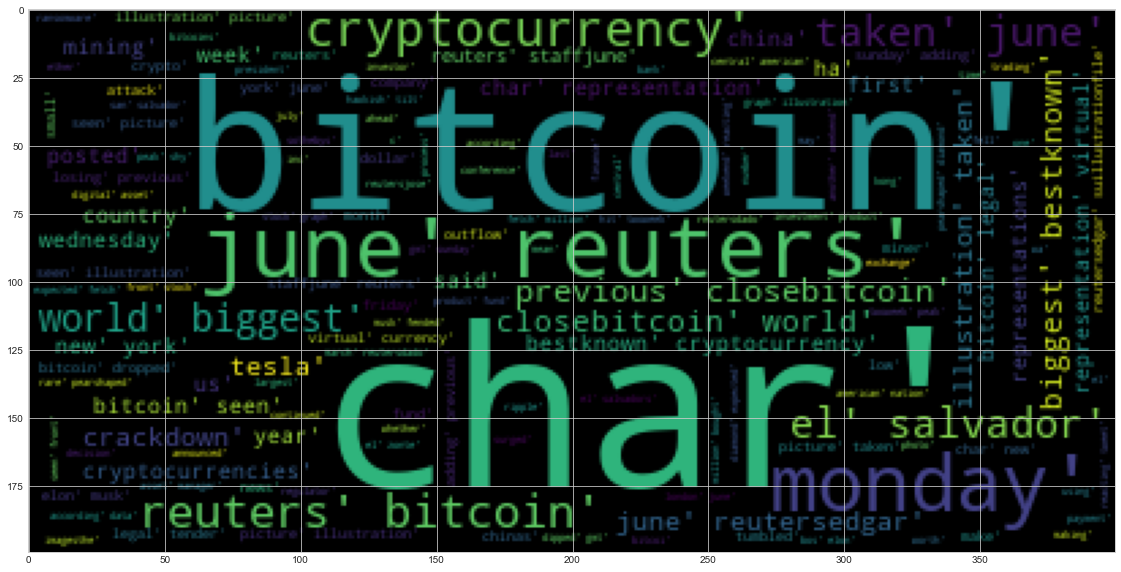

In [22]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
btc_wc = bitcoin_df['tokens'].astype(str)
b_wc = WordCloud().generate(' '.join(btc_wc))
plt.imshow(b_wc)

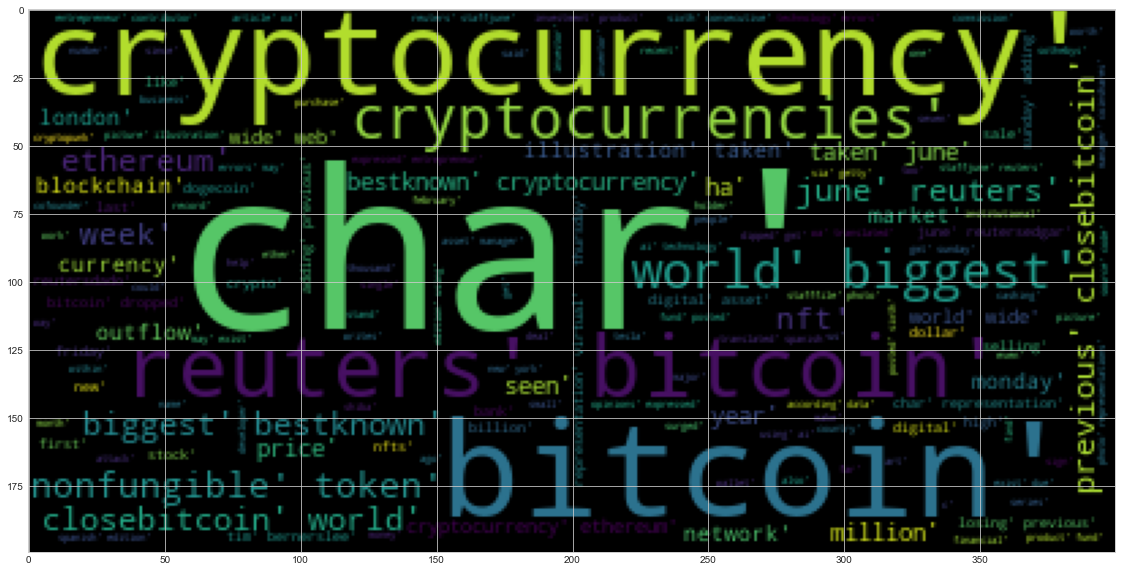

In [23]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_wc = ethereum_df['tokens'].astype(str)
e_wc = WordCloud().generate(' '.join(eth_wc))
plt.imshow(e_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 9.9 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
all_btc_text = bitcoin_df['text'].str.cat()
all_btc_text[:1000]

'It\'s all about clean energy, it seems.\xa0\r\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoi… [+2508 chars]Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars]Several crypto fans that descended on Miami, Florida, last weekend for the largest bitcoin conference in history are now saying theyve tested positive for covid-19. \r\nLarry Cermak, research director … [+2389 chars]image copyrightGetty Images\r\nThe gang behind a "colossal" ransomware attack has demanded $70m (£50.5m) paid in Bitcoin in return for a "universal decryptor" that it says will unlock the files of all … [+4140 chars]SAN SALVADOR, June 16 (Reuters) - El Salvador will not replace the U.S. dollar with bitcoin as the legal tender, Finance Minist

In [28]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(all_btc_text)

# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "BTC NER WORD CLOUD"

In [29]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [30]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc.ents if ent.label_])

['Elon Musk', 'Tesla', 'the past few months', 'Tesla', '$1.5 billion', 'Alex Castro', 'The Verge', 'Three days', 'the holiday weekend', 'Miami', 'Florida', 'last weekend', 'covid-19', 'Larry Cermak', 'copyrightGetty Images', '$70m', '£50.5m', 'June 16', 'Reuters', 'El Salvador', 'U.S.', 'Alejandro Zelaya', 'Wednesday', 'Central American', 'June 23', 'Reuters', 'El Salvador', 'June 23', 'Reuters', 'El Salvador', 'Pr', 'Reuters', 'Reuters', 'El Salvador', 'U.S.', 'Alejandro Zelaya', 'Wednesday', 'the Central American', 'Monday', 'morning', 'earlier this year', 'Reuters', 'June 13', 'Reuters', '9.8%', '39,035.47', 'Sunday', '3,492.71', 'June 21', 'Reuters', 'Monday', 'China', 'Sichuan', 'as low as $32,288', 'first', 'March 15, 2021', 'REUTERS', 'Dado Ruvic/', 'June 30', 'Reuters', 'Reuters', 'FILE', 'June 7, 2021', 'REUTERS', 'Edgar Su/Illustration', 'Reuters', '5.71%', '5.71%', '35,210', '0600', 'Saturday', '2,131.11', '45.7%', '2021', '6', 'June 14, 2021', 'REUTERS', 'Edgar Su/Illustrat

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
all_eth_text = ethereum_df['text'].str.cat()
all_eth_text[:1000]

'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\r\nIs everyone you know investing in cryptocurrency? … [+949 chars]It wasn\'t long ago that your average person had no clue what an NFT was. Nowadays, they\'re making headlines for selling for hundreds of thousands of bucks. Predictably, folks are learning about NFTs … [+3056 chars]Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther overtook bitcoin in the number of active addresses on its network on Friday, a sign that demand is faltering for the world\'s biggest cryptocurrency as its co… [+2727 chars]Ether holders have "staked" more than $13 billion worth of the cryptocurrency on the ethereum 2.0 network, as excitement builds around the overhaul of the system and the potential growth of the staki… [+1851 chars]Ether is the cryptocurrency of the ethereum network.\r\nPhotothek/Getty Images\r\nEther holders have "staked" more than $13 billion wor

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(all_eth_text)
# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "ETHEREUM NER WORD CLOUD"

In [33]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [34]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc.ents if ent.label_])

['21.25', 'June 17', '97%', '+949 chars]It', 'NFT', 'hundreds of thousands', 'Ethereum\r\n', 'Yuriko Nakao', 'Friday', 'more than $13 billion', '2.0', 'Photothek', 'more than $13 billion', '2.0', '$40 billion', '2025', 'JPMorgan', 'Tim Berners-Lee', 'NFT', "Sotheby's", 'NFT', 'Keep Network', 'NuCypher', 'Last week', 'NFT', '90 percent', 'recent weeks', 'recent months', '5.71%', '35,210', '0600', 'Saturday', '2,131.11', '45.7%', '2021', '6', 'AFP', 'Getty Images\r\nInvestors', 'the third week', 'February 2018', '9.83 %', '39,035.47', 'Sunday', '3,492.71', '40.7%', 'year', '27', 'Reuters', 'June 25', 'Reuters', '8.51%', '31,699.83', '22:04 GMT', 'Friday', '2,937.27', 'Reuters', 'June 13', 'Reuters', '5.11 %', '37,360.63', '18:10 GMT on', 'Sunday', '1,817.87', 'Reuters', 'June 13', 'Reuters', '9.83 %', '39,035.47', 'Sunday', '3,492.71', '5.11 %', '37,360.63', '18:10 GMT on', 'Sunday', '1,817.87', '34.7%', 'year', '27,7', 'Reuters', 'June 25', 'Reuters', '7.37%', '32,094.44', 'Friday', '2,

---